#### Brian Ramirez

# Principal Component Analysis

## Research Question
<p>Can Principal Component Analysis (PCA) be used to identify which features account for most of the variance in the hospital data set and reduce the set's dimensionality?</p>

### Goal
<p>The goal of the data analysis is to use PCA to identify which features account for most of the variance in the hospital data set and to reduce the dimensionality.</p>


### How PCA Works and Expected Outcome
<p>Principal Component Analysis is a useful tool in machine learning. According to <em>Principal Component Analysis in Machine Learning</em>, PCA converts variables in a data set into principal components, which are "linear combinations of the original variables"(Biswal, 2023). The expected outcome of PCA is reduced dimensionality and high variance.</p>

### Assumption
<p>An assumption of PCA is that the dataset is standardized prior to analysis. The dataset will be scaled during preprocessing to meet the assumption.</p>

## Data Preparation

### Continuous Variables
<p>The following continuous variables will be used to answer the PCA question proposed in part A1:</p>

| Type | Name | Description |
| :--- | :--- | :--- |
| Continuous | Age | The patient's age at the time of admission. |
| Continuous | VitD_levels | The patient's vitamin D level. |
| Continuous | Doc_visits | The number of times the patient was seen by a physician. |
| Continuous | Full_meals_eaten| The number of full meals the patient consumed. |
| Continuous | VitD_Supp | The number of vitamin D supplements the patient received |
| Continuous | Initial_days | The number of days in the patient's initial stay. | 
| Continuous | TotalCharge | The total charge of the patient's stay. |
| Continuous | Additional_charges | The total cost of miscellaneous charges the patient accrued. |

### Preparation Process
<p>The standardization of the data set occurred as follows:</p>

<strong>Step One</strong>
<ul>
    <li>Import the CSV file into Jupyter Notebook.</li>
    <li>Create a dataframe with the necessary continuous variables.</li>
</ul>

<strong>Imports</strong>
<ul>
    <li>Pandas to import the file and create the dataframe.</li>
    <li>filterwarnings from warnings to ignore redundant warning messages.</li>
</ul>

In [1]:
# Import pandas

import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the CSV file into Jupyter Notebook

df=pd.read_csv('/medical_clean copy.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# Remove unnecessary variables to create data frame with only required continuous variables

irrel_cols = ['Customer_id', 'Interaction', 'ReAdmis', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Income', 'Marital', 'Gender', 'Soft_drink', 'Initial_admin', 'Arthritis', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Complication_risk', 'Overweight', 'Diabetes', 'HighBlood', 'Stroke']

df = df.drop(irrel_cols, axis=1)
df=df.drop(columns = ['CaseOrder'])


In [4]:
# Display dataframe with continuous variables

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.000000,89.000000
VitD_levels,10000.0,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449
Doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.000000,9.000000
Full_meals_eaten,10000.0,1.001400,1.008117,0.000000,0.000000,1.000000,2.000000,7.000000
vitD_supp,10000.0,0.398900,0.628505,0.000000,0.000000,0.000000,1.000000,5.000000
Initial_days,10000.0,34.455299,26.309341,1.001981,7.896215,35.836244,61.161020,71.981490
TotalCharge,10000.0,5312.172769,2180.393838,1938.312067,3179.374015,5213.952000,7459.699750,9180.728000
Additional_charges,10000.0,12934.528587,6542.601544,3125.703000,7986.487755,11573.977735,15626.490000,30566.070000


<strong>Step Two</strong>
<ul>
    <li>Standardize the dataset.</li>
</ul>

<strong>Imports</strong>
<ul>
    <li>StandardScaler from SciKitLearn.preprocessing to standardize and scale the dataset.</li>
</ul>

In [5]:
# Import StandardScaler

from sklearn.preprocessing import StandardScaler


In [6]:
# Standardize the dataset

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


<strong>Copy of the scaled dataset</strong>


In [7]:
# Copy of the scaled dataset

pd.DataFrame(scaled_df).to_csv("scaled_dataset.csv")


## Analysis

### Determine the Matrix of All Principal Components
<strong>Imports</strong><br>
PCA from SciKitLearn.decomposition for the Principal Component Analysis.

In [8]:
# Import PCA

from sklearn.decomposition import PCA


In [9]:
# Transform the dataframe

pca = PCA()
transform_df = pca.fit_transform(scaled_df)


In [10]:
# Create the matrix

matrix_cols = []
i = 1

while i <= len(pca.components_):
    matrix_cols.append('PC' + str(i))
    i += 1

In [11]:
# Display the matrix

loadings = pd.DataFrame(pca.components_, columns = matrix_cols, index = df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Age,0.084545,-0.002714,-0.006886,-0.020539,0.025377,0.701098,0.702159,0.084649
VitD_levels,0.701257,0.019964,0.016393,0.030740,0.015171,-0.089577,-0.078978,0.701523
Doc_visits,0.018273,-0.560857,-0.017846,-0.658255,0.500429,-0.020405,-0.022831,0.010957
Full_meals_eaten,-0.017452,0.416771,0.819605,-0.087265,0.382478,-0.002202,-0.000218,-0.018321
vitD_supp,-0.013412,0.427653,-0.528523,0.188520,0.708301,-0.010754,-0.009761,-0.012463
Initial_days,-0.019396,-0.573097,0.219713,0.722544,0.317359,0.005652,0.007073,-0.006442
TotalCharge,0.706546,-0.002248,0.001299,0.010291,0.000591,0.031692,-0.031300,-0.706184
Additional_charges,0.026263,-0.001520,-0.001091,-0.001623,-0.000601,-0.706303,0.706462,-0.036754


## Identify Total Number of Principal Components
<strong>Imports</strong><br>
pyplot from matplotlib and seaborn to create the plot.

In [12]:
# Import plyplot and seaborn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

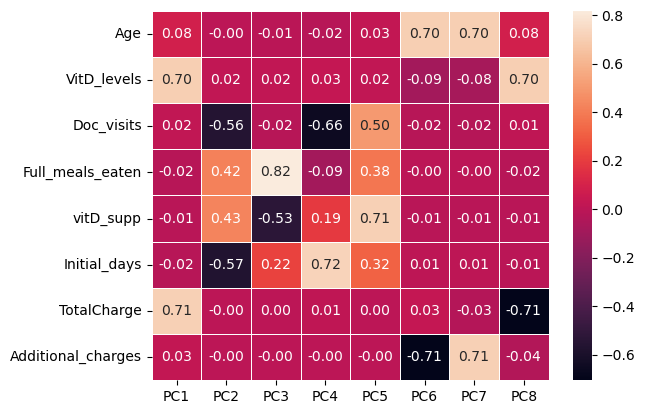

In [13]:
# Heatmap of the matrix

sns.heatmap(loadings, linewidths = .5, annot = True, fmt = '.2f')
plt.show()

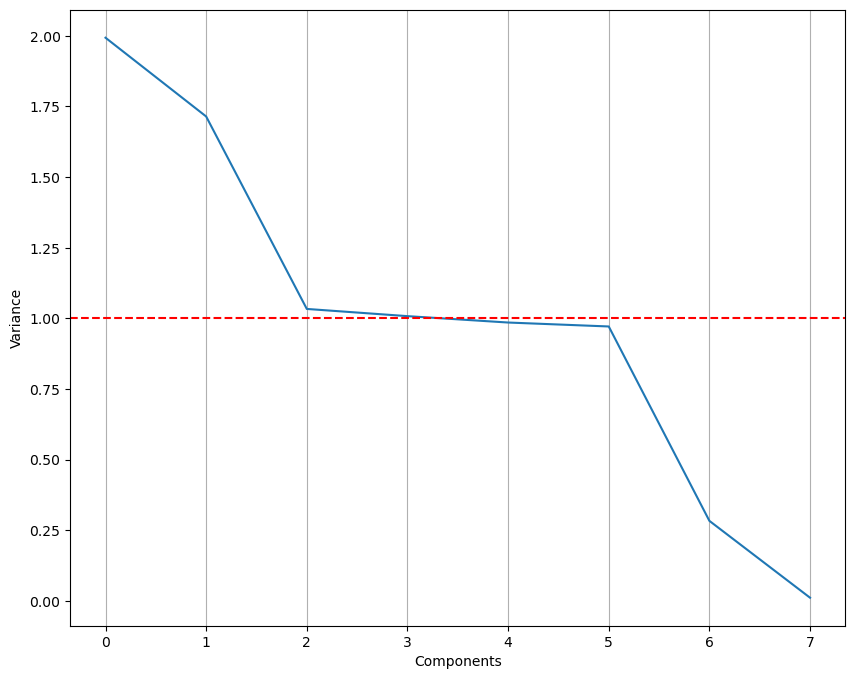

In [14]:
# Create and display the plot

plt.figure(figsize = (10, 8))

features = range(pca.n_components_)
plt.plot(features, pca.explained_variance_)
plt.axhline(y = 1, linestyle = '--', color = 'r')
plt.grid(axis = 'x')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

<strong>Number of Components Based on Kaiser Criterion</strong><br>
The Kaiser Criterion selects principal components with a variance over 1.0 for PCA.<br>
The chart above shows the first four components meet the criteria.

## Identify Variance of the Principal Components

In [15]:
# Create dataframe to display explained variance per PC

pca_pc4 = PCA(n_components = 4, random_state = 0)
pca_pc4.fit_transform(transform_df)
pc4 = pca_pc4.explained_variance_
pc4_edf = pd.DataFrame(pc4, columns = ['Explained Variance per PC'], index = ['PC1', 'PC2', 'PC3', 'PC4'])
pc4_edf

,Explained Variance per PC
PC1,1.992992
PC2,1.714366
PC3,1.033424
PC4,1.007931


In [16]:
# Create dataframe to display % of variance per PC

pc4_var = pca_pc4.explained_variance_ratio_*100
pc4_df = pd.DataFrame(pc4_var.round(2), columns = ['% Variance per PC'], index = ['PC1', 'PC2', 'PC3', 'PC4'])
pc4_df

,% Variance per PC
PC1,24.91
PC2,21.43
PC3,12.92
PC4,12.60


##  Identify Total Variance Captured


In [17]:
# Display sum of variance in Principal Components

total_var = pc4_df['% Variance per PC'].sum()
print('Total % of variance captured by Principal Components: ', total_var, '%')

Total % of variance captured by Principal Components:  71.86 %


## Summary and Results


<p>The Principal Component Analysis reduced the number of variables by 50% per the Kaiser Criterion. The original number of variables was eight and the PCA reduced the number to four. The four principal components identified still account for 71.86% of variance in the data set. The analysis appears to be successful in reducing the number of variables while still capturing the most variance.</p>

#### References:
<p>Biswal, Avijeet. (2023). <em>Principal Component Analysis in Machine Learning: Complete Guide.</em><br> www.simplilearn.com/tutorials/machine-learning-tutorial/principal-component-analysis.</p>